<a href="https://colab.research.google.com/github/yiwenwangANU/Machine_Learning/blob/main/08_Introduction_to_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Download and unzip

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2022-06-06 03:51:49--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 108.177.98.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2022-06-06 03:51:49 (150 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [3]:
import zipfile

file_ref = zipfile.ZipFile('nlp_getting_started.zip')
file_ref.extractall()
file_ref.close()

##Explore the data

In [4]:
import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
train_df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [7]:
train_df.describe(include=['O'])

,keyword,location,text
count,7552,5080,7613
unique,221,3341,7503
top,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...
freq,45,104,10


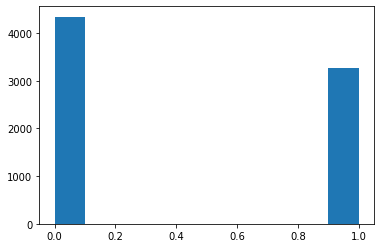

In [8]:
import matplotlib.pyplot as plt

plt.hist(train_df['target'])
plt.show()

In [9]:
import random

train_df_shuffled = train_df.sample(frac=1)
i = random.randint(0, len(train_df)-5)
df_5_sample = train_df_shuffled[i:i+5]
df_5_sample

,id,keyword,location,text,target
4373,6213,hijacker,"Sacramento, CA",California School Bus Hijacker Parole Stands h...,1
6958,9983,tsunami,"Winter Park, Colorado",'Anyway' the old lady went on 'I have somethin...,0
2998,4306,dust%20storm,NaN,Kids Disappear in Dust Storm in Atmospheric Au...,1
1451,2094,casualty,"Washington, D.C.",Canceling Deal for 2 Warships #France Agrees t...,0
7488,10710,wreck,new york,act my age was a MESS everyone was so wild it ...,0


In [10]:
train_df_shuffled[['text']]

,text
3714,@CowgirlLawyer We must refuse to become a nati...
7128,Japan Aogashima Volcano. By Unknown - Check It...
6813,@almusafirah_ you feel trapped innit ??
2664,@channelstv:That's why terrorism is not d war ...
1391,The Bush fires in CA are so crazy
...,...
7098,#Amsterdam POV video captures violent landing ...
1763,@MissJadeBrown tells of the tragic mid-morning...
5078,This is the natural and unavoidable consequenc...
6677,Okay maybe not as extreme as thunder and light...


In [11]:
train_df_shuffled[['text', 'target']]

,text,target
3714,@CowgirlLawyer We must refuse to become a nati...,1
7128,Japan Aogashima Volcano. By Unknown - Check It...,1
6813,@almusafirah_ you feel trapped innit ??,0
2664,@channelstv:That's why terrorism is not d war ...,1
1391,The Bush fires in CA are so crazy,1
...,...,...
7098,#Amsterdam POV video captures violent landing ...,1
1763,@MissJadeBrown tells of the tragic mid-morning...,1
5078,This is the natural and unavoidable consequenc...,0
6677,Okay maybe not as extreme as thunder and light...,0


In [12]:
i = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[['text', 'target']][i:i+5].itertuples():
  _, text, target = row
  print(f"Text: {text}")
  print(f"Is real disaster" if target == 1 else "Not a disaster")

Text: Rly tragedy in MP: Some live to recount horror: ÛÏWhen I saw coaches of my train plunging into water I called myÛ_ http://t.co/gDjTzkpCHK
Is real disaster
Text: Family mourns drowning of 'superhero' toddler with rare epilepsy: Bradley Diebold suffered hundreds of epilepticÛ_ http://t.co/unsayJDTu7
Not a disaster
Text: I'm mentally preparing myself for a bomb ass school year if it's not I'm burning buildings ??
Not a disaster
Text: @Lightning_OOC I AM BEING SUBJECTED TO UNWARRANTED SEXUAL CONVERSATION.
Not a disaster
Text: Stuck in a rainstorm? Stay toward the middle of the road. Most streets are crowned so water tends to pool on the sides.
Not a disaster


In [13]:
train_df_shuffled["text"].to_numpy()

array(['@CowgirlLawyer We must refuse to become a nation with everyone living in fear of being shot unawares by intoxicated &amp;/or crazy people.',
       'Japan Aogashima Volcano. By Unknown - Check It Out! http://t.co/OegFQBIqIq\n #Aogashima #Japan #photography #Volcano',
       '@almusafirah_ you feel trapped innit ??', ...,
       'This is the natural and unavoidable consequence of socialism everywhere it has been tried.\nhttp://t.co/BbDpnj8XSx F',
       'Okay maybe not as extreme as thunder and lightning but pretty much all other types! #FIFA16  https://t.co/ETuuYISLHw',
       'Officials say a quarantine is in place at an Alabama home over a possible Ebola case after developing symptoms... http://t.co/rqKK15uhEY'],
      dtype=object)

##Data preprocessing

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    train_df_shuffled["text"].to_numpy(),
    train_df_shuffled["target"].to_numpy(),
    test_size=0.1, random_state=42)

In [15]:
X_train[:10], y_train[:10]

(array(['Pandemonium In Aba As Woman Delivers Baby Without Face (Photos) - http://t.co/c5u9qsySeJ',
        '24 killed in two simultaneous rail crash as acute floods derail the two trains #India #mumbai... http://t.co/4KBWPCmMbM',
        'Ogun smugglers engage Customs in shootoutåÊ: Several persons were allegedly injured on Wednesday when men o... http://t.co/pUXBC2LoYK #RT',
        'But if you build an army of 100 dogs and their leader is a lion all dogs will fight like a lion.',
        "@TheHammers_ @tonycottee1986 alsowhat if some of the 1st team players got injured?Then Bilic would get slated for playing themhe can't win",
        'Incase of accident the first responders would know that there is a baby present https://t.co/sNaYMLDIUN',
        'Spot Flood Combo 53inch 300W Curved Cree LED Work Light Bar 4X4 Offroad Fog Lamp - Full re\x89Û_ http://t.co/O097vSOtxk http://t.co/I23Xy7iEjj',
        'Islamic State group threatens to kill hostage if \x89Û÷Muslim women\x89Ûª aren\x89Ûª

##TextVectorization

In [16]:
import tensorflow as tf

In [17]:
from tensorflow.keras.layers import TextVectorization

text_vectorizer = TextVectorization(max_tokens=None,
                                    standardize='lower_and_strip_punctuation',
                                    split='whitespace',
                                    ngrams=None,
                                    output_mode='int',
                                    output_sequence_length=None)

In [18]:
sum([len(element.split()) for element in X_train])/len(X_train)

14.936213691431908

In [19]:
text_vectorizer = TextVectorization(max_tokens=10000,
                                    output_mode="int",
                                    output_sequence_length=25)

In [20]:
text_vectorizer.adapt(X_train)

In [21]:
sample_sentence = random.choice(X_train)
print(sample_sentence)
print(text_vectorizer([sample_sentence]))

who said this? Yosemite Sam or Drumpf? ÛÏNobody Û÷ill vote for a flattened out rabbit skin a-huh huh Û_ I always sayÛ
tf.Tensor(
[[  65  198   19 6508 8828   55    1 6404 6376 1340   10    3  469   38
  9390 2298    1 2947  205    8  263 8765    0    0    0]], shape=(1, 25), dtype=int64)


In [22]:
words_in_vocab = text_vectorizer.get_vocabulary()
print(f"Top 5 words:{words_in_vocab[:5]}")
print(f"Last 5 words:{words_in_vocab[-5:]}")

Top 5 words:['', '[UNK]', 'the', 'a', 'in']
Last 5 words:['panama', 'pan', 'pams', 'pampered', 'pampalmater']


##Embedding

In [23]:
from tensorflow.keras.layers import Embedding

embedding = tf.keras.layers.Embedding(input_dim=10000,
                                      output_dim=128,
                                      embeddings_initializer='uniform',
                                      input_length=25)
embedding

In [24]:
sample_sentence = random.choice(X_train)
print(sample_sentence)
print(text_vectorizer([sample_sentence]))
print(embedding(text_vectorizer([sample_sentence])))

Da Judge Gave Dis Girl 5pm Curfew ??????
tf.Tensor(
[[1550 2434  905 3928  421 4185  348    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]], shape=(1, 25), dtype=int64)
tf.Tensor(
[[[ 0.03863415  0.03560409 -0.01833057 ...  0.02023372 -0.03549648
    0.02780655]
  [-0.0250881   0.04141178  0.00052143 ... -0.0119815   0.04243788
    0.02288929]
  [-0.04353203 -0.03439186 -0.04010222 ... -0.03056082  0.03056942
   -0.04483699]
  ...
  [-0.00599284  0.03012855  0.01042619 ...  0.04251481  0.03382142
   -0.01594906]
  [-0.00599284  0.03012855  0.01042619 ...  0.04251481  0.03382142
   -0.01594906]
  [-0.00599284  0.03012855  0.01042619 ...  0.04251481  0.03382142
   -0.01594906]]], shape=(1, 25, 128), dtype=float32)


##Model 0: Naive Bayes Model as a Baseline

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [26]:
baseline_score = model_0.score(X_test, y_test)
baseline_score

0.8083989501312336

In [27]:
model_0.predict(X_test[:10])

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0])

In [28]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

def evaluate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred)
  model_precision, model_recall, model_fscore, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
  model_result = {'model_accuracy': model_accuracy,
                  'model_precision': model_precision,
                  'model_recall': model_recall,
                  'model_fscore': model_fscore}
  return model_result

In [29]:
model_0_result = evaluate_results(y_true = y_test, y_pred = model_0.predict(X_test))
model_0_result

{'model_accuracy': 0.8083989501312336,
 'model_fscore': 0.8024451290626649,
 'model_precision': 0.8183398501301564,
 'model_recall': 0.8083989501312336}

##Create callbacks

In [30]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, TensorBoard, EarlyStopping, ModelCheckpoint
import datetime

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=1, min_lr=1e-7, verbose=1)

early_stop = EarlyStopping(monitor='val_loss', patience=3)

def create_checkpoint(checkpoint_filepath):
  filepath = "model_checkpoints/" + checkpoint_filepath + ".ckpt"
  model_checkpoint = ModelCheckpoint(filepath=filepath,
                                     save_weights_only=True,
                                     monitor='val_loss',
                                     save_best_only=True)
  return model_checkpoint

def create_tensorboard(log_dir):
  log_dir = "tensorboard_log" + "/" + log_dir + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback  

##Model 1: Simple Dense Model

In [32]:
from tensorflow.keras.layers import Dense, Input, GlobalAveragePooling1D, Dropout

inputs = Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs) 
x = Embedding(input_dim=10000, output_dim=128, input_length=25)(x)
x = Dropout(0.2)(x)
x = GlobalAveragePooling1D()(x)
x = Dropout(0.2)(x)
outputs = Dense(1, activation='sigmoid')(x)

model_1 = tf.keras.Model(inputs, outputs)
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 25)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 25, 128)           1280000   
                                                                 
 dropout (Dropout)           (None, 25, 128)           0         
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 128)               0     

In [33]:
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
#X_train = tf.expand_dims(X_train, 0)
#X_test = tf.expand_dims(X_test, 0)

In [34]:
X_train

array(['Pandemonium In Aba As Woman Delivers Baby Without Face (Photos) - http://t.co/c5u9qsySeJ',
       '24 killed in two simultaneous rail crash as acute floods derail the two trains #India #mumbai... http://t.co/4KBWPCmMbM',
       'Ogun smugglers engage Customs in shootoutåÊ: Several persons were allegedly injured on Wednesday when men o... http://t.co/pUXBC2LoYK #RT',
       ...,
       '@D1ff3r3nt1sG00d @RiceeChrispies What if he committed a mass murder?',
       'Richard returns after whirlwind few days http://t.co/L8W30WFW3R #MLB',
       'ISIL claims suicide bombing at Saudi mosque that killed at least 15 http://t.co/Y8IcF89H6w http://t.co/t9MSnZV1Kb'],
      dtype=object)

In [35]:
history_1 = model_1.fit(X_train, y_train,
                        epochs=9,
                        validation_data=(X_test, y_test),
                        callbacks=[create_tensorboard('Dense'),
                                   create_checkpoint('Dense'),
                                   reduce_lr,
                                   early_stop])

Saving TensorBoard log files to: tensorboard_log/Dense/20220606-035315
Epoch 1/9
215/215 [==============================] - 5s 5ms/step - loss: 0.6495 - accuracy: 0.6225 - val_loss: 0.5837 - val_accuracy: 0.7336 - lr: 0.0010
Epoch 2/9
215/215 [==============================] - 1s 5ms/step - loss: 0.5162 - accuracy: 0.7898 - val_loss: 0.4841 - val_accuracy: 0.7992 - lr: 0.0010
Epoch 3/9
215/215 [==============================] - 1s 4ms/step - loss: 0.4166 - accuracy: 0.8349 - val_loss: 0.4511 - val_accuracy: 0.8084 - lr: 0.0010
Epoch 4/9
215/215 [==============================] - 1s 5ms/step - loss: 0.3543 - accuracy: 0.8619 - val_loss: 0.4254 - val_accuracy: 0.8215 - lr: 0.0010
Epoch 5/9
215/215 [==============================] - 1s 5ms/step - loss: 0.3071 - accuracy: 0.8812 - val_loss: 0.4215 - val_accuracy: 0.8241 - lr: 0.0010
Epoch 6/9
212/215 [============================>.] - ETA: 0s - loss: 0.2708 - accuracy: 0.8968
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.000200000

In [36]:
model_1.load_weights('model_checkpoints/Dense.ckpt')

In [37]:
model_1_pred_pros = model_1.predict(X_test)
y_pred_1 = tf.round(tf.squeeze(model_1_pred_pros)).numpy()

In [38]:
model_1_result = evaluate_results(y_true = y_test, y_pred = y_pred_1)
model_1_result

{'model_accuracy': 0.8241469816272966,
 'model_fscore': 0.8227699073158506,
 'model_precision': 0.8240432683421577,
 'model_recall': 0.8241469816272966}

In [39]:
import numpy as np

np.array(list(model_1_result.values())) > np.array(list(model_0_result.values()))

array([ True,  True,  True,  True])

##LSTM model

In [40]:
from tensorflow.keras.layers import Dense, Input, GlobalAveragePooling1D, Dropout, LSTM
import tensorflow as tf

inputs = Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = Embedding(input_dim=10000, output_dim=128, input_length=25)(x)
x = Dropout(0.2)(x)
x = LSTM(units=64, return_sequences=True)(x)
x = Dropout(0.2)(x)
x = LSTM(units=64)(x)
x = Dropout(0.2)(x)
#x = GlobalAveragePooling1D()(x)
outputs = Dense(1, activation='sigmoid')(x)

model_2 = tf.keras.Model(inputs, outputs)

In [41]:
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [42]:
history_2 = model_2.fit(X_train, y_train,
                        epochs=9,
                        validation_data=(X_test, y_test),
                        callbacks=[create_tensorboard('LSTM'),
                                   create_checkpoint('LSTM'),
                                   reduce_lr,
                                   early_stop])

Saving TensorBoard log files to: tensorboard_log/LSTM/20220606-035338
Epoch 1/9
215/215 [==============================] - 8s 13ms/step - loss: 0.5174 - accuracy: 0.7381 - val_loss: 0.4258 - val_accuracy: 0.8123 - lr: 0.0010
Epoch 2/9
215/215 [==============================] - ETA: 0s - loss: 0.3321 - accuracy: 0.8672
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
215/215 [==============================] - 2s 9ms/step - loss: 0.3321 - accuracy: 0.8672 - val_loss: 0.4897 - val_accuracy: 0.8084 - lr: 0.0010
Epoch 3/9
213/215 [============================>.] - ETA: 0s - loss: 0.1932 - accuracy: 0.9321
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
215/215 [==============================] - 2s 9ms/step - loss: 0.1932 - accuracy: 0.9321 - val_loss: 0.5114 - val_accuracy: 0.8031 - lr: 2.0000e-04
Epoch 4/9
214/215 [============================>.] - ETA: 0s - loss: 0.1559 - accuracy: 0.9509
Epoch 4: ReduceLROnPlateau reducing learning

In [43]:
model_2.load_weights('model_checkpoints/LSTM.ckpt')
model_2_pred_pros = model_2.predict(X_test)
y_pred_2 = tf.round(tf.squeeze(model_2_pred_pros)).numpy()
model_2_result = evaluate_results(y_true = y_test, y_pred = y_pred_2)
model_2_result

{'model_accuracy': 0.8123359580052494,
 'model_fscore': 0.8100256509536126,
 'model_precision': 0.8131471247629316,
 'model_recall': 0.8123359580052494}

##GRU model

In [44]:
from tensorflow.keras.layers import GRU

inputs = Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = Embedding(input_dim=10000, output_dim=128, input_length=25)(x)
x = Dropout(0.2)(x)
x = GRU(units=64)(x)
x = Dropout(0.2)(x)
outputs = Dense(1, activation='sigmoid')(x)

model_3 = tf.keras.Model(inputs, outputs)

In [45]:
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [46]:
history_3 = model_3.fit(X_train, y_train,
                        epochs=9,
                        validation_data=(X_test, y_test),
                        callbacks=[create_tensorboard('GRU'),
                                   create_checkpoint('GRU'),
                                   reduce_lr,
                                   early_stop])

Saving TensorBoard log files to: tensorboard_log/GRU/20220606-035353
Epoch 1/9
215/215 [==============================] - 4s 9ms/step - loss: 0.6563 - accuracy: 0.6046 - val_loss: 0.4619 - val_accuracy: 0.8018 - lr: 0.0010
Epoch 2/9
215/215 [==============================] - 2s 7ms/step - loss: 0.4005 - accuracy: 0.8318 - val_loss: 0.4229 - val_accuracy: 0.8228 - lr: 0.0010
Epoch 3/9
206/215 [===========================>..] - ETA: 0s - loss: 0.2784 - accuracy: 0.8946
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
215/215 [==============================] - 1s 6ms/step - loss: 0.2796 - accuracy: 0.8937 - val_loss: 0.5712 - val_accuracy: 0.7730 - lr: 0.0010
Epoch 4/9
213/215 [============================>.] - ETA: 0s - loss: 0.1721 - accuracy: 0.9440
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
215/215 [==============================] - 1s 7ms/step - loss: 0.1728 - accuracy: 0.9437 - val_loss: 0.5445 - val_accuracy: 0.8110 - lr

In [47]:
model_3.load_weights('model_checkpoints/GRU.ckpt')
model_3_pred_pros = model_3.predict(X_test)
y_pred_3 = tf.round(tf.squeeze(model_3_pred_pros)).numpy()
model_3_result = evaluate_results(y_true = y_test, y_pred = y_pred_3)
model_3_result

{'model_accuracy': 0.8228346456692913,
 'model_fscore': 0.821720970419648,
 'model_precision': 0.8224360247609642,
 'model_recall': 0.8228346456692913}

##Bidirectional model

In [48]:
from tensorflow.keras.layers import Bidirectional

inputs = Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = Embedding(input_dim=10000, output_dim=128, input_length=25)(x)
x = Dropout(0.2)(x)
x = Bidirectional(LSTM(units=64))(x)
x = Dropout(0.2)(x)
outputs = Dense(1, activation='sigmoid')(x)

model_4 = tf.keras.Model(inputs, outputs)

In [49]:
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [50]:
history_4 = model_4.fit(X_train, y_train,
                        epochs=9,
                        validation_data=(X_test, y_test),
                        callbacks=[create_tensorboard('Bidir'),
                                   create_checkpoint('Bidir'),
                                   reduce_lr,
                                   early_stop])
                        

Saving TensorBoard log files to: tensorboard_log/Bidir/20220606-035403
Epoch 1/9
215/215 [==============================] - 6s 13ms/step - loss: 0.5383 - accuracy: 0.7287 - val_loss: 0.4208 - val_accuracy: 0.8202 - lr: 0.0010
Epoch 2/9
211/215 [============================>.] - ETA: 0s - loss: 0.3323 - accuracy: 0.8657
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
215/215 [==============================] - 2s 9ms/step - loss: 0.3322 - accuracy: 0.8662 - val_loss: 0.4525 - val_accuracy: 0.8031 - lr: 0.0010
Epoch 3/9
210/215 [============================>.] - ETA: 0s - loss: 0.1930 - accuracy: 0.9289
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
215/215 [==============================] - 2s 9ms/step - loss: 0.1928 - accuracy: 0.9289 - val_loss: 0.5644 - val_accuracy: 0.7835 - lr: 2.0000e-04
Epoch 4/9
210/215 [============================>.] - ETA: 0s - loss: 0.1592 - accuracy: 0.9442
Epoch 4: ReduceLROnPlateau reducing learnin

In [51]:
model_4.load_weights('model_checkpoints/Bidir.ckpt')
model_4_pred_pros = model_4.predict(X_test)
y_pred_4 = tf.round(tf.squeeze(model_4_pred_pros)).numpy()
model_4_result = evaluate_results(y_true = y_test, y_pred = y_pred_4)
model_4_result

{'model_accuracy': 0.8202099737532809,
 'model_fscore': 0.81874440692901,
 'model_precision': 0.8200967364870706,
 'model_recall': 0.8202099737532809}

##Conv1D model

In [52]:
from tensorflow.keras.layers import Conv1D

inputs = Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = Embedding(input_dim=10000, output_dim=128, input_length=25)(x)
x = Dropout(0.2)(x)
x = Conv1D(filters=32, kernel_size=5, activation='relu')(x)
x = Dropout(0.2)(x)
x = GlobalAveragePooling1D()(x)
outputs = Dense(1, activation='sigmoid')(x)

model_5 = tf.keras.Model(inputs, outputs)

In [53]:
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [54]:
history_5 = model_5.fit(X_train, y_train,
                        epochs=9,
                        validation_data=(X_test, y_test),
                        callbacks=[create_tensorboard('Conv1D'),
                                   create_checkpoint('Conv1D'),
                                   reduce_lr,
                                   early_stop])

Saving TensorBoard log files to: tensorboard_log/Conv1D/20220606-035416
Epoch 1/9
215/215 [==============================] - 11s 12ms/step - loss: 0.5628 - accuracy: 0.7057 - val_loss: 0.4325 - val_accuracy: 0.8202 - lr: 0.0010
Epoch 2/9
215/215 [==============================] - 2s 11ms/step - loss: 0.3563 - accuracy: 0.8529 - val_loss: 0.4274 - val_accuracy: 0.8215 - lr: 0.0010
Epoch 3/9
211/215 [============================>.] - ETA: 0s - loss: 0.2540 - accuracy: 0.8991
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
215/215 [==============================] - 2s 10ms/step - loss: 0.2551 - accuracy: 0.8988 - val_loss: 0.5154 - val_accuracy: 0.7953 - lr: 0.0010
Epoch 4/9
210/215 [============================>.] - ETA: 0s - loss: 0.1718 - accuracy: 0.9414
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
215/215 [==============================] - 2s 10ms/step - loss: 0.1723 - accuracy: 0.9410 - val_loss: 0.5070 - val_accuracy: 0.8

In [55]:
model_5.load_weights('model_checkpoints/Conv1D.ckpt')
model_5_pred_pros = model_5.predict(X_test)
y_pred_5 = tf.round(tf.squeeze(model_5_pred_pros)).numpy()
model_5_result = evaluate_results(y_true = y_test, y_pred = y_pred_5)
model_5_result

{'model_accuracy': 0.821522309711286,
 'model_fscore': 0.8202370591929079,
 'model_precision': 0.8212481161337067,
 'model_recall': 0.821522309711286}

##Transfer learning using universal-sentence-encoder 

In [56]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embeddings = embed([
    "The quick brown fox jumps over the lazy dog.",
    "I am a sentence for which I would like to get its embedding"])

print(embeddings)

tf.Tensor(
[[-0.03133019 -0.06338634 -0.01607501 ... -0.03242778 -0.04575738
   0.05370455]
 [ 0.05080861 -0.01652431  0.01573778 ...  0.00976658  0.0317012
   0.01788118]], shape=(2, 512), dtype=float32)


In [57]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model 
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE") 

In [58]:
model_6 = tf.keras.Sequential([
  sentence_encoder_layer,
  Dense(64, activation='relu'),
  Dense(1, activation='sigmoid')                               
])

In [59]:
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [60]:
history_6 = model_6.fit(X_train, y_train,
                        epochs=9,
                        validation_data=(X_test, y_test),
                        callbacks=[create_tensorboard('USE'),
                                   create_checkpoint('USE'),
                                   reduce_lr,
                                   early_stop])

Saving TensorBoard log files to: tensorboard_log/USE/20220606-035507
Epoch 1/9
215/215 [==============================] - 13s 41ms/step - loss: 0.5036 - accuracy: 0.7797 - val_loss: 0.4286 - val_accuracy: 0.8150 - lr: 0.0010
Epoch 2/9
215/215 [==============================] - 7s 32ms/step - loss: 0.4165 - accuracy: 0.8130 - val_loss: 0.4227 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 3/9
215/215 [==============================] - 7s 31ms/step - loss: 0.4033 - accuracy: 0.8206 - val_loss: 0.4198 - val_accuracy: 0.8097 - lr: 0.0010
Epoch 4/9
215/215 [==============================] - 7s 30ms/step - loss: 0.3948 - accuracy: 0.8257 - val_loss: 0.4171 - val_accuracy: 0.8123 - lr: 0.0010
Epoch 5/9
215/215 [==============================] - 7s 30ms/step - loss: 0.3872 - accuracy: 0.8298 - val_loss: 0.4146 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 6/9
210/215 [============================>.] - ETA: 0s - loss: 0.3802 - accuracy: 0.8347
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020

In [61]:
model_6.load_weights('model_checkpoints/USE.ckpt')
model_6_pred_pros = model_6.predict(X_test)
y_pred_6 = tf.round(tf.squeeze(model_6_pred_pros)).numpy()
model_6_result = evaluate_results(y_true = y_test, y_pred = y_pred_6)
model_6_result

{'model_accuracy': 0.8149606299212598,
 'model_fscore': 0.8141167288719497,
 'model_precision': 0.8143126998590242,
 'model_recall': 0.8149606299212598}

##USE with 10% of the data

In [62]:
df_10_percent = pd.DataFrame({'X_train': X_train,
                              'y_train':y_train}).sample(frac=0.1)
df_10_percent

,X_train,y_train
51,Your brain is particularly vulnerable to traum...,0
4846,Only been back 10 &amp; a whirlwind has hit ja...,0
4930,Who is bringing the tornadoes and floods. Who ...,0
1849,I rated Catastrophe (2015) 8/10 #IMDb - hilar...,0
1531,@montetjwitter11 @Mets @audreyp77 @teena_797 @...,0
...,...,...
4815,Daniel 12:11 And from the time that the daily...,0
1303,Then the stylist who'd been silent says 'there...,0
3064,Removing tsunami debris from the West Coast: K...,1
6714,.: .: .: .: .: .: .: .: .: .: .: .: .: .: .: ....,0


In [63]:
X_train_10_percent = list(df_10_percent['X_train'])
y_train_10_percent = list(df_10_percent['y_train'])
len(X_train_10_percent)

685

In [64]:
model_7 = tf.keras.models.clone_model(model_6)

In [65]:
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [66]:
history_7 = model_7.fit(X_train_10_percent, y_train_10_percent,
                        epochs=9,
                        validation_data=(X_test, y_test),
                        callbacks=[create_tensorboard('USE_10_percent'),
                                   create_checkpoint('USE_10_percent'),
                                   reduce_lr,
                                   early_stop])

Saving TensorBoard log files to: tensorboard_log/USE_10_percent/20220606-035639
Epoch 1/9
22/22 [==============================] - 7s 237ms/step - loss: 0.6702 - accuracy: 0.6949 - val_loss: 0.6427 - val_accuracy: 0.7625 - lr: 0.0010
Epoch 2/9
22/22 [==============================] - 5s 216ms/step - loss: 0.5997 - accuracy: 0.8146 - val_loss: 0.5783 - val_accuracy: 0.7743 - lr: 0.0010
Epoch 3/9
22/22 [==============================] - 5s 223ms/step - loss: 0.5245 - accuracy: 0.8175 - val_loss: 0.5191 - val_accuracy: 0.7795 - lr: 0.0010
Epoch 4/9
22/22 [==============================] - 5s 219ms/step - loss: 0.4617 - accuracy: 0.8263 - val_loss: 0.4834 - val_accuracy: 0.7874 - lr: 0.0010
Epoch 5/9
22/22 [==============================] - 5s 223ms/step - loss: 0.4166 - accuracy: 0.8277 - val_loss: 0.4654 - val_accuracy: 0.7900 - lr: 0.0010
Epoch 6/9
22/22 [==============================] - 5s 215ms/step - loss: 0.3851 - accuracy: 0.8409 - val_loss: 0.4574 - val_accuracy: 0.7822 - lr: 0.0

In [67]:
model_7.load_weights('model_checkpoints/USE_10_percent.ckpt')
model_7_pred_pros = model_7.predict(X_test)
y_pred_7 = tf.round(tf.squeeze(model_7_pred_pros)).numpy()
model_7_result = evaluate_results(y_true = y_test, y_pred = y_pred_7)
model_7_result

{'model_accuracy': 0.7887139107611548,
 'model_fscore': 0.7888400406035532,
 'model_precision': 0.7889908441539928,
 'model_recall': 0.7887139107611548}

##Evaluate the models

In [86]:
df_result = pd.DataFrame({'Base_model': model_0_result,
                          'Dense_model': model_1_result,
                          'LSTM_model': model_2_result,
                          'GRU_model': model_3_result,
                          'Bidirectional_model': model_4_result,
                          'Conv1D_model': model_5_result,
                          'USE_model': model_6_result,
                          'USE_model_10_percent': model_7_result})
df_result = df_result.transpose()

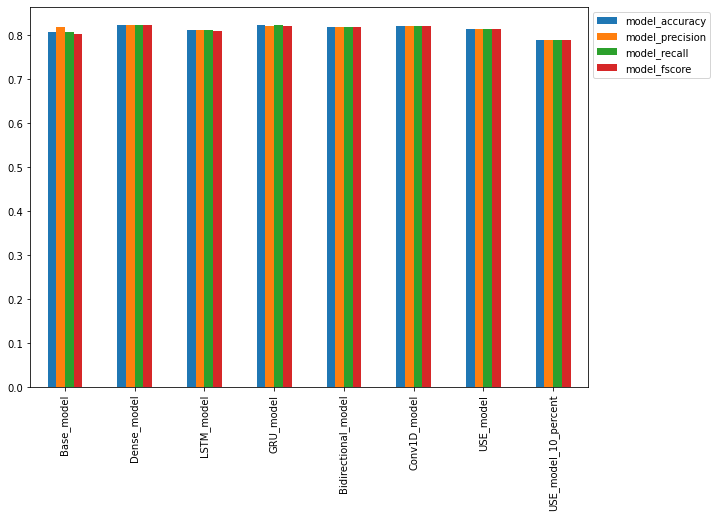

In [72]:
df_result.plot(kind='bar', figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only
  """Entry point for launching an IPython kernel.


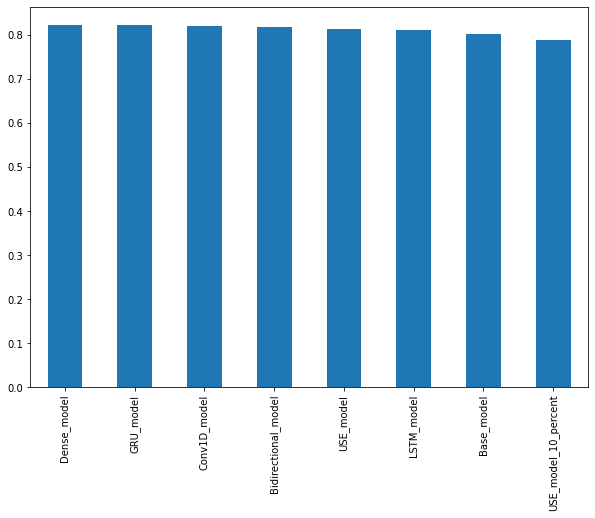

In [85]:
df_result['model_fscore'].sort_values(0, ascending=False).plot(kind='bar', figsize=(10, 7))

##Upload to Tensorboard

In [89]:
!tensorboard dev upload \
    --logdir ./tensorboard_log/ \
    --name "NLP modelling experiments" \
    --description "A series of different NLP modellings experiments with various models" \
    --one_shot # exits the uploader when upload has finished


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./tensorboard_log/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=yFOzBctO0HVCb5ZgMNMtQd6eKDQklq&prompt=consent&access_type=of

In [90]:
model_6.save('model_6.h5')

In [92]:
loaded_model_6 = tf.keras.models.load_model('model_6.h5', custom_objects={"KerasLayer": hub.KerasLayer})

In [93]:
loaded_model_6_pred_pros = loaded_model_6.predict(X_test)
y_pred_6_l = tf.round(tf.squeeze(loaded_model_6_pred_pros)).numpy()
loaded_model_6_result = evaluate_results(y_true = y_test, y_pred = y_pred_6_l)
loaded_model_6_result

{'model_accuracy': 0.8149606299212598,
 'model_fscore': 0.8141167288719497,
 'model_precision': 0.8143126998590242,
 'model_recall': 0.8149606299212598}